In [3]:
import pandas as pd

trending_videos = pd.read_csv('C:\\Users\hp\Downloads\\trending_videos.csv')
print(trending_videos.head(3))

      video_id                                     title  \
0  O9i2vmFhSSY       Heretic | Official Trailer HD | A24   
1  GFLb5h2O2Ww  This Disease is Deadlier Than The Plague   
2  U8XH3W0cMss                RED ONE | Official Trailer   

                                         description          published_at  \
0  SUBSCRIBE: http://bit.ly/A24subscribe\r\n\r\nF...  2024-06-25T13:00:31Z   
1  All Links, sources & further reading: https://...  2024-06-25T14:00:01Z   
2  Watch the trailer for #RedOneMovie now, starri...  2024-06-25T16:00:14Z   

                 channel_id               channel_title  category_id  \
0  UCuPivVjnfNo4mb3Oog_frZg                         A24            1   
1  UCsXVk37bltHxD1rDPwtNM8Q  Kurzgesagt – In a Nutshell           27   
2  UCf5CjDJvsFvtVIhkfmKAwAA          Amazon MGM Studios           24   

                                                tags  duration definition  \
0  ['a24', 'a24 films', 'a24 trailers', 'independ...   PT2M24S         hd   
1  

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\hp\AppData\Local\Temp\ipykernel_2784\3292157864.py:3: SyntaxWarning: invalid escape sequence '\h'
  trending_videos = pd.read_csv('C:\\Users\hp\Downloads\\trending_videos.csv')


In [4]:
trending_videos.isnull().sum()

video_id          0
title             0
description       0
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [5]:
trending_videos.dtypes

video_id          object
title             object
description       object
published_at      object
channel_id        object
channel_title     object
category_id        int64
tags              object
duration          object
definition        object
caption             bool
view_count         int64
like_count         int64
dislike_count      int64
favorite_count     int64
comment_count      int64
dtype: object

In [6]:
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

In [7]:
trending_videos.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,200.000000,2.000000e+02,2.000000e+02,200.0,200.0,200.000000
mean,18.545000,2.551061e+06,1.090544e+05,0.0,0.0,6085.385000
std,6.507667,1.087531e+07,4.426706e+05,0.0,0.0,19857.251088
min,1.000000,9.277400e+04,9.800000e+02,0.0,0.0,52.000000
25%,17.000000,4.087800e+05,1.241975e+04,0.0,0.0,1001.750000
50%,20.000000,6.446915e+05,2.983100e+04,0.0,0.0,1829.500000
75%,24.000000,1.605542e+06,7.113250e+04,0.0,0.0,3770.500000
max,28.000000,1.238213e+08,4.867772e+06,0.0,0.0,222533.000000


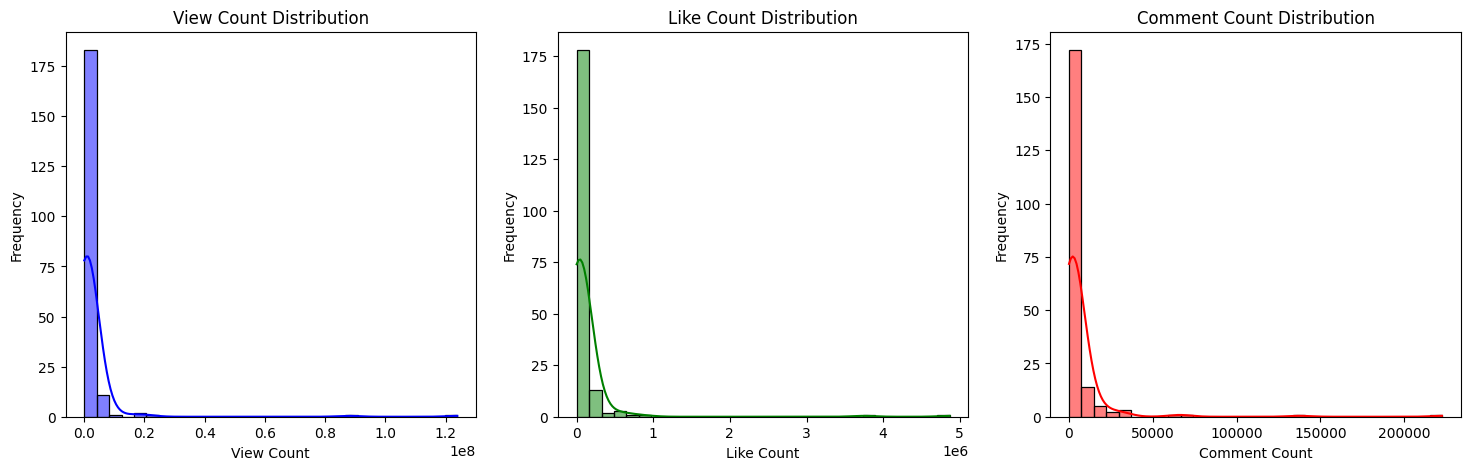

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.show()

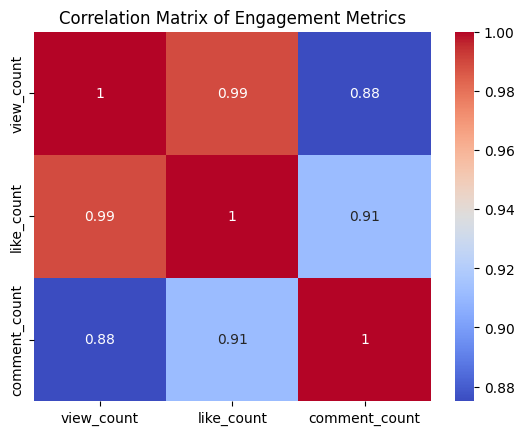

In [9]:
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2784\1211282388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


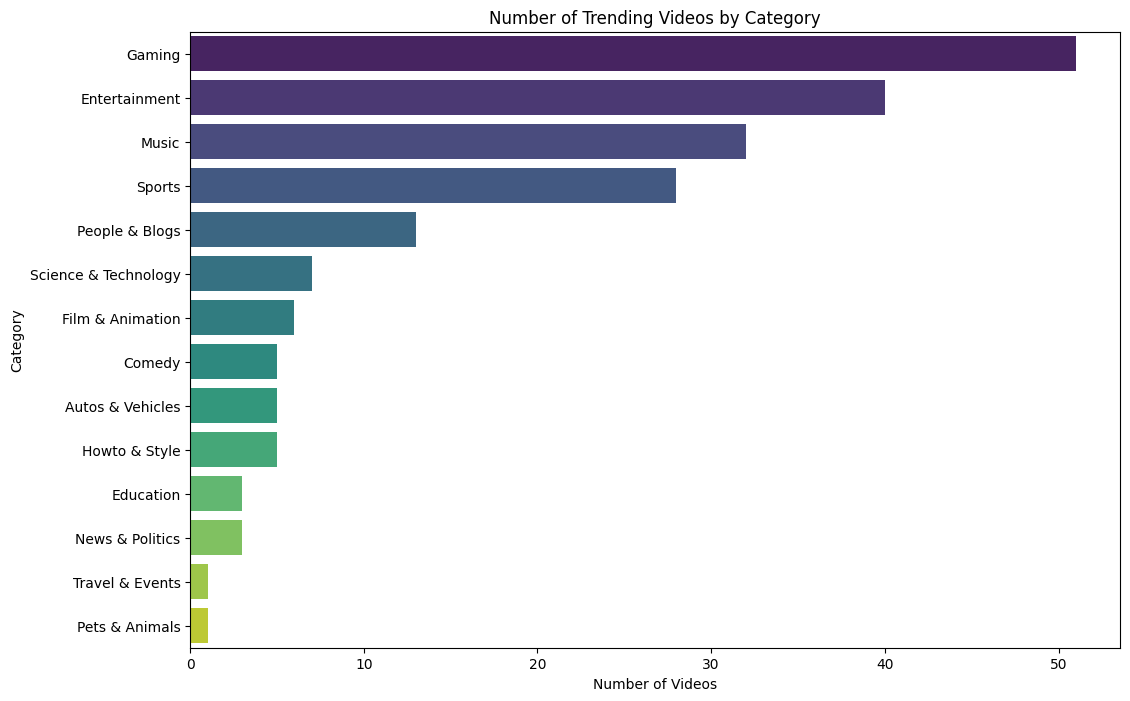

In [14]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2784\4021299173.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_2784\4021299173.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_2784\4021299173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.in

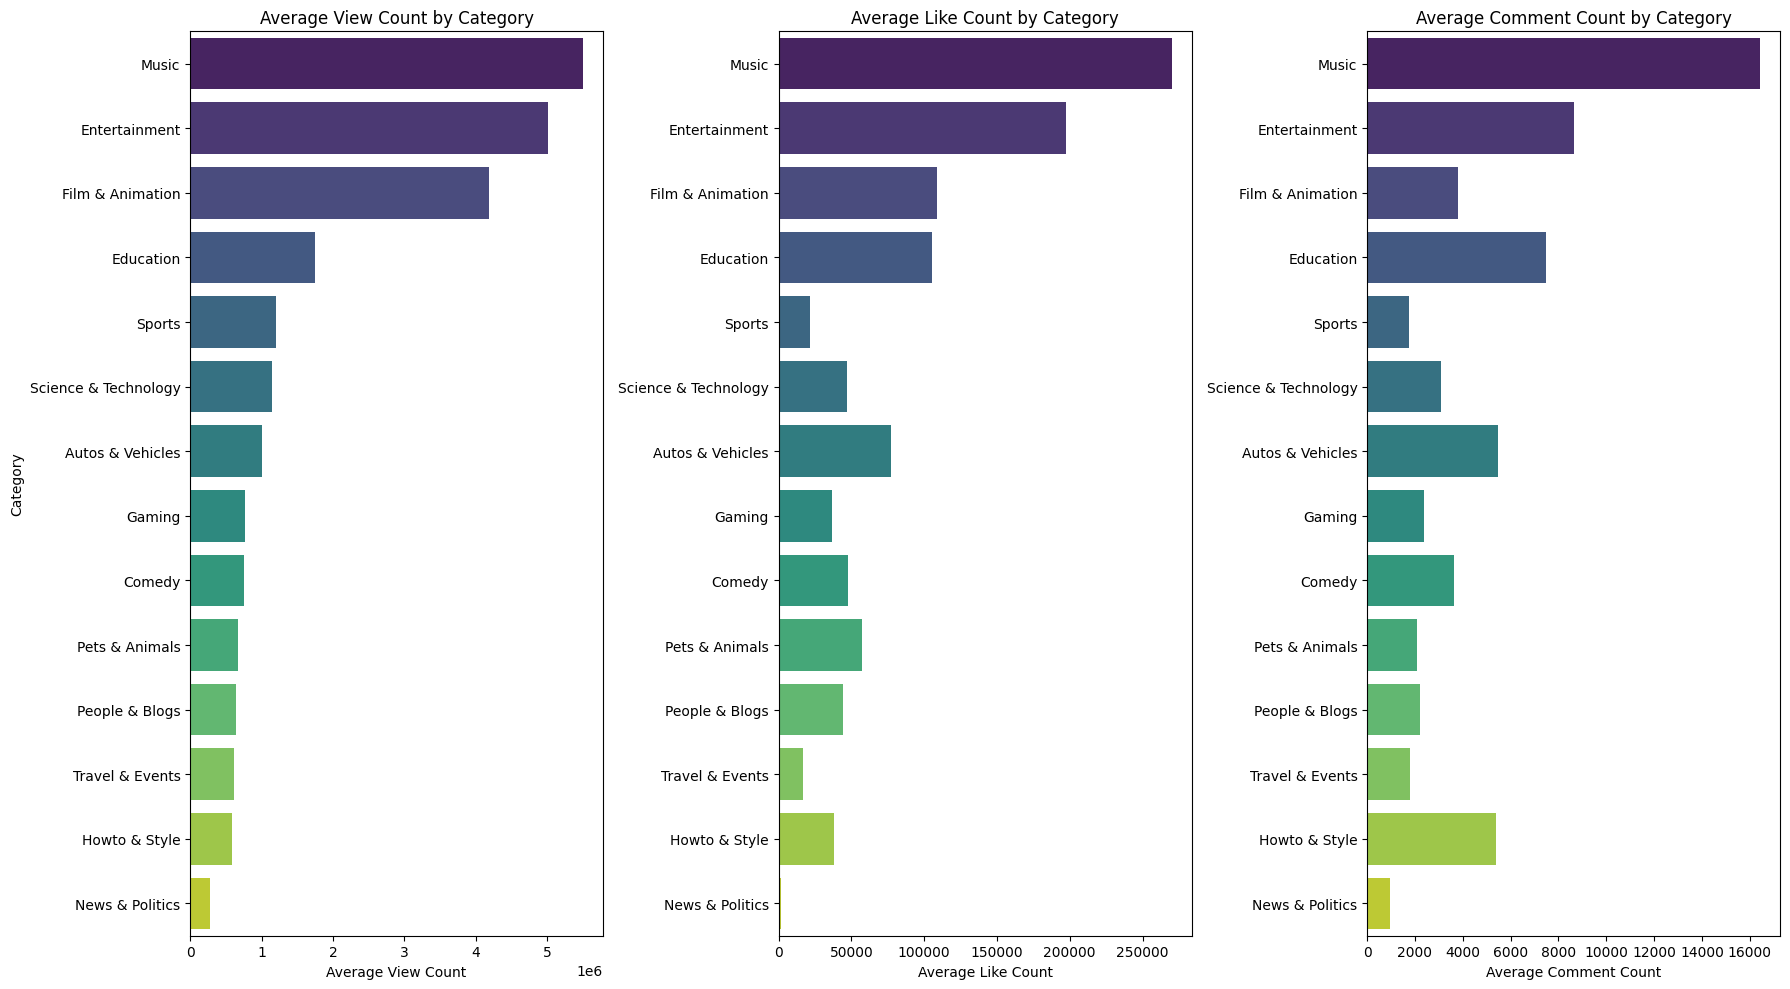

In [15]:
#average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

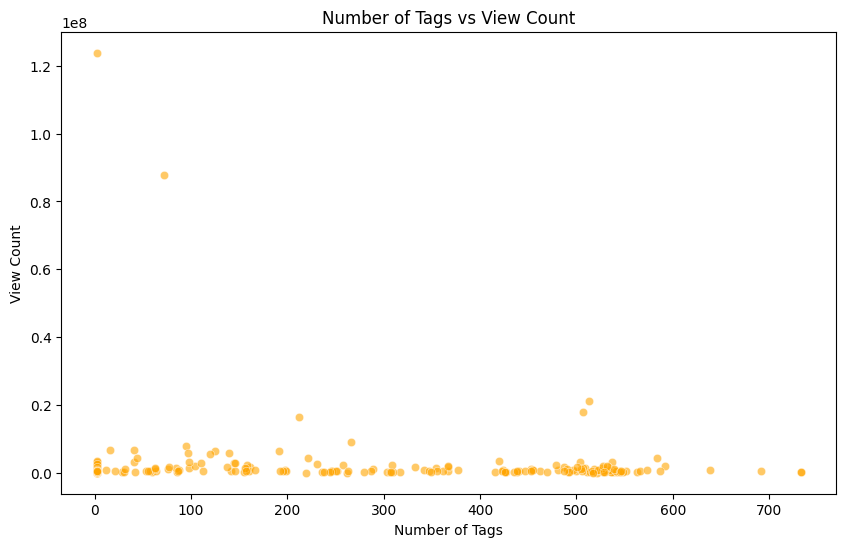

In [17]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2784\1314667626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


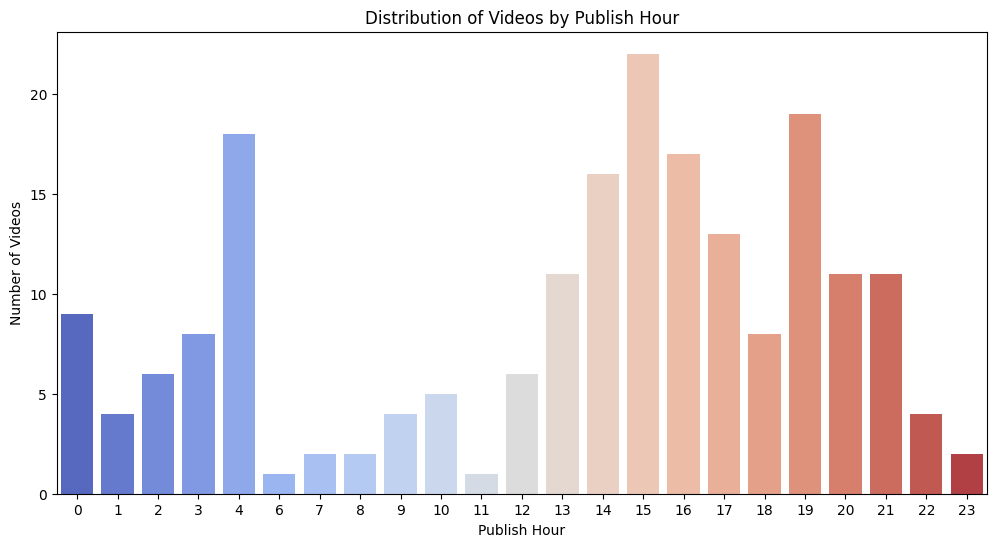

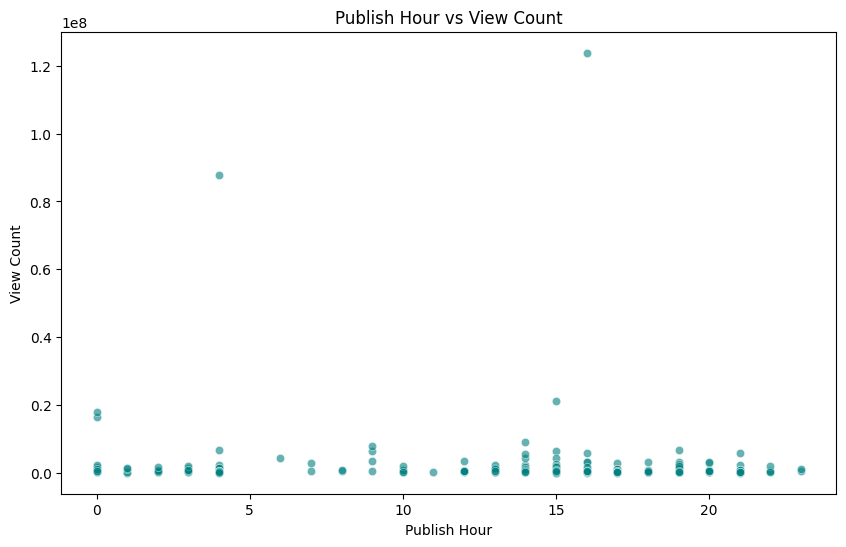

In [18]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

# Conclusion
So, here’s my conclusion on what makes a video trend on YouTube:

->Encourage viewers to like and comment on videos to boost engagement metrics. <br>
->Schedule video uploads around peak times (2 PM – 8 PM) to maximize initial views and engagement.